# SOLUTIONS to Worksheet 1.1: Coin Tossing

Solutions by Eric Johnson

These are solutions to Worksheet 1.1 that I am also using as an example of how to type and format **completed solutions** to assignments.  The main deliverable for the assignments is a more terse report-style PDF, but the code used to generate that PDF must also be turned in.  This is an example of what such code could look like.  

In particular, this notebook will **always indicate what problem** we're working on!  We may penalize assignments that have code that we cannot parse.  This is not meant to be overly prescriptive about things, but is a bare minimum requirement that we have discovered over teaching this course many times.  In this example, I am going to copy the questions over - I personally find this useful to remember what I'm doing - but you only need to give the problem number.

Also! Please restart and re-run your entire notebook before submitting by going to the menu: Kernel > Restart and Run All

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

## Setting the seed so that the output is the same everytime.
## Don't do this until you're done messing around and want to start 
## writing things up!
np.random.seed(123456789)

> **Problem 1.** As introduced in the tutorial, the basic random number generator in Python is the `np.random.rand` function.
> 
> **Problem  1.a.** Use the `help()` function to read about the various arguments and keyword arguments that `np.random.rand` takes.  Describe how to use this funtion in your own words.

It seems like `rand` gives uniform random numbers between 0 and 1 based on an input shape.

In [2]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

> **Problem 1.b.**  Generate many random numbers (how many is "many"?) and print their maximum and minimum to the screen.  How many of your numbers are bigger than 0.5?  How many are bigger than 0.6?  0.95?

I think "many" can be a big number, so let's do a million.

In [3]:
N = 1000000
rands = np.random.rand(N)

bigger_than_5 = np.sum(rands > 0.5)
bigger_than_6 = np.sum(rands > 0.6)
bigger_than_95 = np.sum(rands > 0.95)

print(f"There are {bigger_than_5} random numbers bigger than 0.5")
print(f"There are {bigger_than_6} random numbers bigger than 0.6")
print(f"There are {bigger_than_95} random numbers bigger than 0.95")

There are 499202 random numbers bigger than 0.5
There are 399945 random numbers bigger than 0.6
There are 49940 random numbers bigger than 0.95


> **Problem 1.c.** Based on your generated numbers, what is the likelihood of getting a number bigger than 0.75?

The probability should just be the fraction that are bigger:

In [4]:
prob_075 = np.sum(rands > 0.75) / N
print(f"The probability of getting a number bigger than 0.75 is {prob_075:%}")

The probability of getting a number bigger than 0.75 is 24.983800%


> **Problem 1.d.** To what number would I want to compare my random numbers so that 60\% of the time I get a `True` and the rest of the time I get a `False`?

As we can see from the previous problem, we can use 0.6 as a threshold to compare our numbers to.  That is, if we ask `random_number < 0.6`, then 60% of the time we'll get True and 40% False.

> **Problem 1.e.** Explain in words how you can use `np.random.rand` to simulate a coin where $P(\text{Heads}) = 0.6$.

See previous answer except that now we interpret True as being a Heads and False as being Tails.

> **Problem 2.**  As pointed out in the course notes, flipping one coin isn't that exciting, but flipping many coins can be very exciting!
> 
> **Problem 2.a.**  Again using $p=P(\text{Heads}) = 0.6$, flip $N = 10$ coins.  

We can use our plan from the previous problem: draw 10 random numbers, compare them to 0.6, and interpret heads as True and Tails as False.

In [5]:
N_coins = 10
p = 0.6
flips = np.random.rand(N_coins)
heads = flips < p

for ii in range(N_coins):
    if heads[ii]:
        print(f"{flips[ii]:.4f} <  0.6 so the coin toss yielded Heads!")
    else:
        print(f"{flips[ii]:.4f} >= 0.6 so the coin toss yielded Tails!")

0.9537 >= 0.6 so the coin toss yielded Tails!
0.9805 >= 0.6 so the coin toss yielded Tails!
0.2880 <  0.6 so the coin toss yielded Heads!
0.0471 <  0.6 so the coin toss yielded Heads!
0.4702 <  0.6 so the coin toss yielded Heads!
0.0805 <  0.6 so the coin toss yielded Heads!
0.4765 <  0.6 so the coin toss yielded Heads!
0.2317 <  0.6 so the coin toss yielded Heads!
0.2091 <  0.6 so the coin toss yielded Heads!
0.0027 <  0.6 so the coin toss yielded Heads!


> **Problem 2.b.** Count the number of heads.

In [6]:
print(f"There were {np.sum(heads)} heads!")

There were 8 heads!


> **Problem 2.c.** Write a **function** that returns the number of heads in $N$ flips of a coin with $p = P(\text{Heads})$.  That is, $N$ and $p$ are **inputs** (arguments) to your function and $k=$ the number of heads is the **output**.

In [7]:
def coin_flipper(N_coins, p_heads):
    """Simulate 'N_coins' tosses of a coin with 'p_heads' probability of
    heads to get the number of heads.
    
    This function draws 'N_coins' uniform random numbers at once and then
    uses logical comparison to see if they are less than 'p_heads'.  We
    can then add up all the Trues to get the number of Heads!
    
    Inputs:
    =======
    N_coins: (integer) Number of coins to flip
    p_heads: (float) Probability of individual flip being Heads
    
    Outputs:
    ========
    N_heads: (integer) Number of flips that were heads.
    """
    
    ## "Flip" N_coins coins.
    flips = np.random.rand(N_coins)
    
    ## See if they were heads
    is_heads = flips < p_heads
    
    ## Count the number of heads
    N_heads = np.sum(is_heads)
    
    return N_heads

## Let's test our new function!
N_coins = [10, 100, 245]
p_heads = [0.6, 0.2, 0.4]

for ii in range(3):
    ## Does it work??
    N_heads = coin_flipper(N_coins[ii], p_heads[ii])
    
    ## Seems to!
    print(f"Out of {N_coins[ii]} flips, {N_heads} were heads!")

Out of 10 flips, 6 were heads!
Out of 100 flips, 15 were heads!
Out of 245 flips, 98 were heads!


> **Problem 2.d.** **Bonus:** Describe your function and write a [docstring](https://www.python.org/dev/peps/pep-0257/).  Consider the following questions: How did you choose to count the number of heads in your coin tosses?  What are other ways you could have done this?  Do you flip all your coins at once or one at a time?  Does your function check the inputs to make sure they're the correct type or value?

See the function above for an example!

> **Problem 3.** Let $Y$ be the random variable corresponding to the number of heads generated in an "experiment" of flipping $N=10$ coins, where each coin has $P(\text{Heads}) = 0.6$.  Repeat this experiment $M=100$ times, saving the outcome each time.

In [8]:
## Set our parameters
N_exp = 100
N_coins = 10
p_heads = 0.6

## Initialize the output
obs_heads = np.zeros(N_exp)

## Loop to do many experiments!
for expNo in range(N_exp):
    obs_heads[expNo] = coin_flipper(N_coins, p_heads)

> **Problem 4.** Let's explore the data (!?) you just generated.
>
> **Problem 4.a.** What are the maximal and minimal numbers of heads that you observed in your experiments?

In [9]:
print(f"The fewest heads observed was {obs_heads.min()}")
print(f"The most heads observed was {obs_heads.max()}")

The fewest heads observed was 2.0
The most heads observed was 10.0


> **Problem 4.b.** How many unique values are there in your dataset (Hint: `np.unique`)?

In [10]:
unique_outcomes = np.unique(obs_heads)
print(f"There were {len(unique_outcomes)} unique outcomes:")
print(unique_outcomes)

There were 9 unique outcomes:
[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]


> **Problem 4.c.** How many times do you observe 0 heads, 1 heads, 2 heads, etc.?  What would be an appropriate diagram with which to display this information?

We should probably use a histogram, but for now we can just print off the results by looping through the possible outcomes (0 heads to 10 heads) and counting how many experiments yielded that result.

In [11]:
for outcome in range(N_coins + 1):
    N_matching = np.sum(obs_heads == outcome)
    print(f"There were {N_matching} experiments with {outcome} Heads!")

There were 0 experiments with 0 Heads!
There were 0 experiments with 1 Heads!
There were 1 experiments with 2 Heads!
There were 4 experiments with 3 Heads!
There were 10 experiments with 4 Heads!
There were 19 experiments with 5 Heads!
There were 26 experiments with 6 Heads!
There were 21 experiments with 7 Heads!
There were 16 experiments with 8 Heads!
There were 1 experiments with 9 Heads!
There were 2 experiments with 10 Heads!


> **Problem 4.d.** Create a figure that shows your **frequency distribution**.  Label the axes and if necessary, provide a legend or annotate your figure.  Make sure the $y$-axis is scaled and labeled so that it is easy to read off how many times you observed each number of heads.

We can repurpose the loop above to save the results.  We can then use a bar plot to plot the frequency distribution.

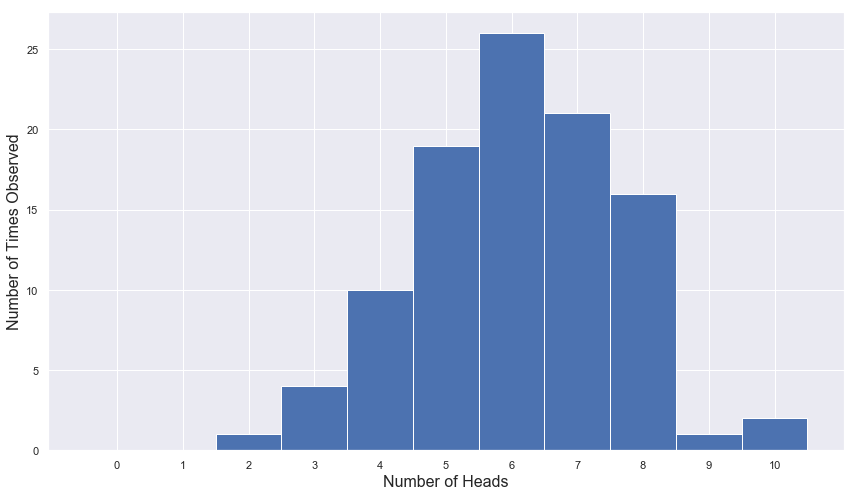

In [12]:
outcomes = np.arange(N_coins + 1)
N_obs_outcomes = np.zeros_like(outcomes)
for outcome in outcomes:
    N_matching = np.sum(obs_heads == outcome)
    N_obs_outcomes[outcome] = N_matching
    
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

_ = ax.bar(outcomes, N_obs_outcomes, width=1)

_ = ax.set_xlabel("Number of Heads", fontsize=16)
_ = ax.set_ylabel("Number of Times Observed", fontsize=16)

_ = ax.set_xticks(outcomes)


fig.tight_layout()
fig.savefig("UNAnnotated_CoinFlip_Histogram.png", format='png', dpi=600)

> **Problem 4.e.** Describe your distribution qualitatively.  Estimate the mean, median, and mode by eye. 

The distribution seems to be unimodal centered between 5 and 7.  The mean and median are probably ~6, but the mode is 6.

> **Problem 5.** It's often useful to annotate your figures with relevant calculations or quantities.  Let's do that here.
> 
> **Problem 5.a.** Using either `np.mean` or the formula for expected value, calculate the mean, $\mu$ of your observations.  Display this value on your figure using the `plt.vlines` function and using a `legend` or `plt.text`.

In [13]:
mean_N_heads = np.mean(obs_heads)
print(f"The mean number of heads is {mean_N_heads}")

The mean number of heads is 6.09


> **Problem 5.b.** Using either `np.median` or some other method, calculate the median of your observations and display the value on your figure.

In [14]:
median_N_heads = np.median(obs_heads)
print(f"The median number of heads is {median_N_heads}")

The median number of heads is 6.0


> **Problem 5.c.** Calculate the mode of your observations and display the value on your figure.

In [15]:
mode_N_heads = outcomes[N_obs_outcomes == N_obs_outcomes.max()][0]

print(f"The mode of the number of heads is {mode_N_heads}")

The mode of the number of heads is 6


> **Problem 5.d.** Calculate the standard deviation, $\sigma$ of your observations either by using the formula for variance or the `np.std` function.  Display $\mu\pm\sigma$ using `plt.vlines` and annotate the value of $\sigma$ in a legend or using `plt.text`.

In [16]:
std_N_heads = np.std(obs_heads)

print(f"The standard deviation of the number of heads is {std_N_heads}")

The standard deviation of the number of heads is 1.5368474224853943


> **Problem 5.e. BONUS:** Use the `axes.get_ylim` and `axes.set_ylim` functions to control the range of your `plt.vlines` function and to preserve the $y$-axis range of your figure.

Since I wrote this worksheet, I have learned about the `plt.axvline` function that does this for you automatically!  I'll show how both can be used.

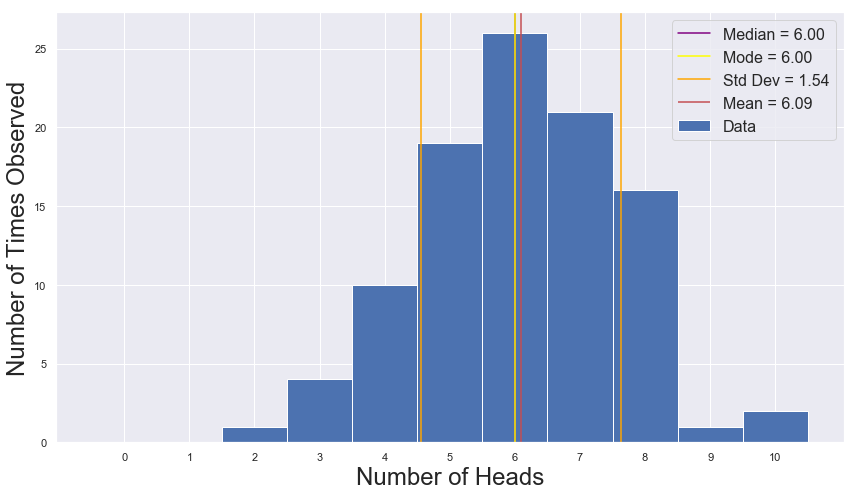

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

_ = ax.bar(outcomes, N_obs_outcomes, width=1, label='Data')

ylim = ax.get_ylim()

_ = ax.vlines(mean_N_heads, ymin=ylim[0], ymax=ylim[1], color='r',
              label=f"Mean = {mean_N_heads:.2f}")

_ = ax.set_ylim(ylim)

_ = ax.axvline(median_N_heads, color='purple',
               label=f"Median = {median_N_heads:.2f}")

_ = ax.axvline(mode_N_heads, color='yellow',
               label=f"Mode = {mode_N_heads:.2f}")

_ = ax.axvline(mean_N_heads-std_N_heads,
               color='orange',
               label=f"Std Dev = {std_N_heads:.2f}")
_ = ax.axvline(mean_N_heads+std_N_heads,
               color='orange')

_ = ax.set_xlabel("Number of Heads", fontsize=24)
_ = ax.set_ylabel("Number of Times Observed", fontsize=24)

_ = ax.legend(fontsize=16)

_ = ax.set_xticks(outcomes)

fig.tight_layout()
fig.savefig("Annotated_CoinFlip_Histogram.png", format='png', dpi=600)

> **Problem 6.**  As noted above, the quantity you should be working with is a *frequency distribution*, so how can we make it a *probability distribution*?
> 
> **Problem 6.a.** Make a list of the different outcomes and the number of times each outcome is observed.  You should try to do this "by hand", but you can also look at `np.histogram` or `plt.hist`.  Make sure that both sets of outputs are *integers*.

We did this above, but we can compare to `np.histogram` as well.  Notice that this function does not know that the outcomes must be integers and tries to infer the bins from the data.

In [18]:
freqs, bins = np.histogram(obs_heads)

for ii in range(len(freqs)):
    print(f"There were {freqs[ii]} exps with k in [{bins[ii]:.2g}, {bins[ii+1]:.2g}]")

There were 1 exps with k in [2, 2.8]
There were 4 exps with k in [2.8, 3.6]
There were 10 exps with k in [3.6, 4.4]
There were 19 exps with k in [4.4, 5.2]
There were 0 exps with k in [5.2, 6]
There were 26 exps with k in [6, 6.8]
There were 21 exps with k in [6.8, 7.6]
There were 16 exps with k in [7.6, 8.4]
There were 1 exps with k in [8.4, 9.2]
There were 2 exps with k in [9.2, 10]


> **Problem 6.b.** What is the sum of the counts list?  (This is a good sanity check that you are doing things right.)

In [19]:
print(f"There were {np.sum(N_obs_outcomes)} experiments counted! (Should be {N_exp}!)")

There were 100 experiments counted! (Should be 100!)


> **Problem 6.c.** Based on your data, what is the probability of getting 0 heads?  1 heads?  2 heads?  That is, if I randomly grabbed one of your outcomes out of a bag, how often would I get $k=4$ heads?

Similar to the previous problem, we can convert between *number* and *probability* by dividing by the number of experiments.  That is, out of 100 experiments, we saw none that had 0 heads, so the estimated probability of 0 heads is 0%.

In [20]:
for outcome in range(N_coins + 1):
    p_matching = np.sum(obs_heads == outcome) / N_exp
    print(f"The probability of {outcome} Heads is {p_matching:.3g}!")

The probability of 0 Heads is 0!
The probability of 1 Heads is 0!
The probability of 2 Heads is 0.01!
The probability of 3 Heads is 0.04!
The probability of 4 Heads is 0.1!
The probability of 5 Heads is 0.19!
The probability of 6 Heads is 0.26!
The probability of 7 Heads is 0.21!
The probability of 8 Heads is 0.16!
The probability of 9 Heads is 0.01!
The probability of 10 Heads is 0.02!


> **Problem 6.d.** Generate a list of the *probabilities* of each of your outcomes.  Use this list to show the **PDF** of your data.  Using your PDF, replicate your earlier annotated figure.  Confirm that the sum of your probabilities is 1.

The total likelihood of the outcomes is 1


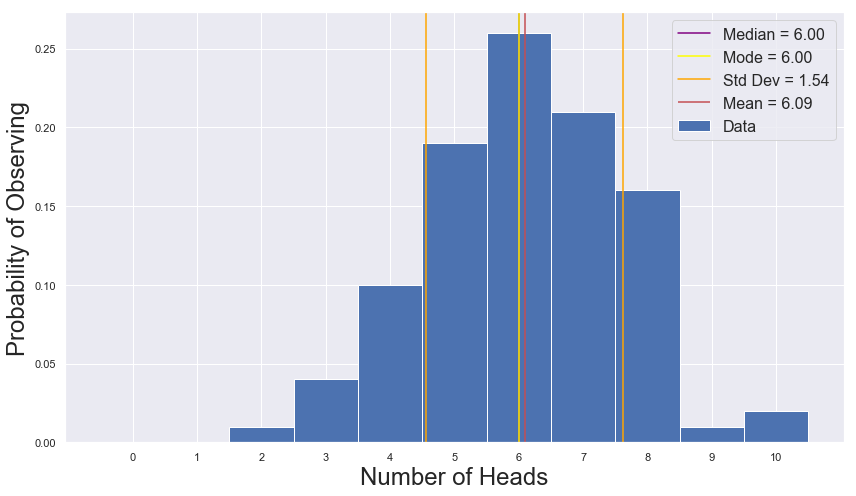

In [21]:
outcomes = np.arange(N_coins + 1)
prob_outcomes = np.zeros_like(outcomes).astype(float) ## NOTE THIS!
for outcome in outcomes:
    p_matching = np.sum(obs_heads == outcome) / N_exp
    prob_outcomes[outcome] = p_matching
    
print(f"The total likelihood of the outcomes is {np.sum(prob_outcomes):.3g}")
    
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

_ = ax.bar(outcomes, prob_outcomes, width=1, label='Data')

ylim = ax.get_ylim()

_ = ax.vlines(mean_N_heads, ymin=ylim[0], ymax=ylim[1], color='r',
              label=f"Mean = {mean_N_heads:.2f}")

_ = ax.set_ylim(ylim)

_ = ax.axvline(median_N_heads, color='purple',
               label=f"Median = {median_N_heads:.2f}")

_ = ax.axvline(mode_N_heads, color='yellow',
               label=f"Mode = {mode_N_heads:.2f}")

_ = ax.axvline(mean_N_heads-std_N_heads,
               color='orange',
               label=f"Std Dev = {std_N_heads:.2f}")
_ = ax.axvline(mean_N_heads+std_N_heads,
               color='orange')

_ = ax.set_xlabel("Number of Heads", fontsize=24)
_ = ax.set_ylabel("Probability of Observing", fontsize=24)

_ = ax.legend(fontsize=16)

_ = ax.set_xticks(outcomes)

fig.tight_layout()
fig.savefig("Annotated_CoinFlip_Histogram_Normed.png", format='png', dpi=600)

> **Problem 6.e.** Compare your figure to one generated by `sns.histplot` or `plt.hist`.  Are the bins, bar heights, and other features the same?  Describe any discrepancies or similarities.  In `sns.distplot`, what is the overlaid line?

If we provide bin edges, we can make the output of `histplot` match our bar plot.

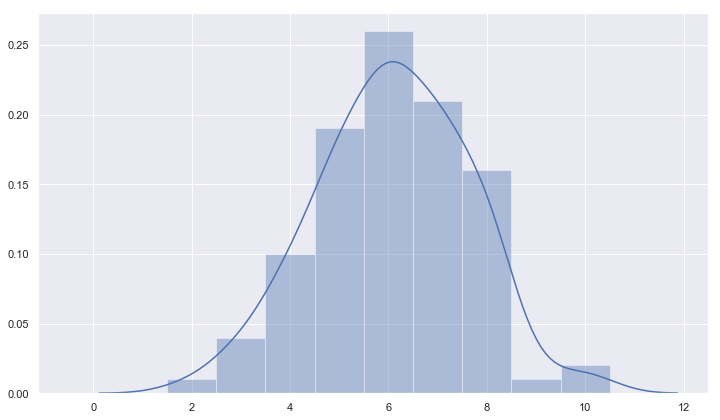

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.arange(-0.5, 11)
_ = sns.histplot(obs_heads, ax=ax, bins=bins, stat='probability')